In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import logging

# Change file_path as necessary
file_path = "../Relevant data" 

os.chdir(file_path)

In [2]:
import scipy
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
bms_13to17 = pd.read_csv("bms_13to17_kW_est.csv", parse_dates=True)
bms_13to17.TimeStamp = pd.to_datetime(bms_13to17.TimeStamp)
#bms_13to17 = bms_13to17.drop('level_0', axis = 1)
bms_13to17

,Unnamed: 0,index,Humidity,ML_PH/Main_11kV_kW (kW),Temp,TimeStamp,Type_of_day,kVA,kW,kW_est
0,0,0,45,0.0,21.6,2013-01-01 00:00:00,Normal_Weekday,956.3,NaN,879.796
1,1,1,46,0.0,21.2,2013-01-01 00:30:00,Normal_Weekday,937.8,NaN,862.776
2,2,2,50,0.0,20.2,2013-01-01 01:00:00,Normal_Weekday,918.7,NaN,845.204
3,3,3,52,0.0,18.7,2013-01-01 01:30:00,Normal_Weekday,913.0,NaN,839.960
4,4,4,50,0.0,18.5,2013-01-01 02:00:00,Normal_Weekday,900.7,NaN,828.644
5,5,5,47,0.0,18.4,2013-01-01 02:30:00,Normal_Weekday,921.8,NaN,848.056
6,6,6,46,0.0,18.2,2013-01-01 03:00:00,Normal_Weekday,923.7,NaN,849.804
7,7,7,46,0.0,18.0,2013-01-01 03:30:00,Normal_Weekday,929.3,NaN,854.956
8,8,8,46,0.0,17.3,2013-01-01 04:00:00,Normal_Weekday,939.5,NaN,864.340
9,9,9,49,0.0,16.9,2013-01-01 04:30:00,Normal_Weekday,927.0,NaN,852.840


In [ ]:
bms_13to17_copy =bms_13to17.set_index(bms_13to17.TimeStamp).fillna(0)
bms_13to17_copy = bms_13to17_copy[['kW_est']]
bms_13to17_copy

In [22]:
normal_weekdays = bms_13to17[bms_13to17.Type_of_day == 'Normal_Weekday'].reset_index()
normal_weekdays = normal_weekdays.drop('level_0', axis = 1)
normal_weekdays

,Unnamed: 0,index,Humidity,ML_PH/Main_11kV_kW (kW),Temp,TimeStamp,Type_of_day,kVA,kW,kW_est
0,0,0,45,0.0,21.6,2013-01-01 00:00:00,Normal_Weekday,956.3,NaN,879.796
1,1,1,46,0.0,21.2,2013-01-01 00:30:00,Normal_Weekday,937.8,NaN,862.776
2,2,2,50,0.0,20.2,2013-01-01 01:00:00,Normal_Weekday,918.7,NaN,845.204
3,3,3,52,0.0,18.7,2013-01-01 01:30:00,Normal_Weekday,913.0,NaN,839.960
4,4,4,50,0.0,18.5,2013-01-01 02:00:00,Normal_Weekday,900.7,NaN,828.644
5,5,5,47,0.0,18.4,2013-01-01 02:30:00,Normal_Weekday,921.8,NaN,848.056
6,6,6,46,0.0,18.2,2013-01-01 03:00:00,Normal_Weekday,923.7,NaN,849.804
7,7,7,46,0.0,18.0,2013-01-01 03:30:00,Normal_Weekday,929.3,NaN,854.956
8,8,8,46,0.0,17.3,2013-01-01 04:00:00,Normal_Weekday,939.5,NaN,864.340
9,9,9,49,0.0,16.9,2013-01-01 04:30:00,Normal_Weekday,927.0,NaN,852.840


In [ ]:
#checking trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(bms_13to17_copy, model='additive',freq=421)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
result.seasonal[1:300].plot()

In [ ]:
# Adapted from John Boland's 'Power_Spectrum_Rwine.xls' worksheet\n",

def power(values,timestamps,freq):
    N2 = len(values)/2
    cos_power = (np.cos(np.pi*(freq-1)/N2*timestamps)*values)[1:].sum()/N2
    sin_power = (np.sin(np.pi*(freq-1)/N2*timestamps)*values)[1:].sum()/N2
    return cos_power**2 + sin_power**2


In [ ]:
powerlist = []
for i in range(1,4000):
    powerlist.append(power(only_studyperioddays.kW_est.values, pd.Series(range(1,8833)),i))
    
powerlist

In [ ]:
powerseries = pd.Series(powerlist)
df = powerseries.nlargest(50).sort_values(ascending = False).reset_index()
df['day_cycles'] = (df[df.columns[0]] + 1) / 48
df

In [ ]:
df[df.columns[1]].plot()

In [6]:
# Set frequencies
daily = 2*np.pi/2/24

freqs = {
    'daily':daily,
    'yearly':(1/365.24219)*daily,
    'half_yearly':(1/365.24219*2)*daily,
    'twice_a_day' : 2*daily
    #'freq1' : daily/3.8,
    #'freq2' : daily/7.68,
    #'freq3' : daily/ 0.0413,
    #'freq4' : daily/0.0645
        }

In [7]:
def fourier_terms(time_stamp,**args):
    M = np.empty(shape=(len(time_stamp),len(args)*2))
    freq_names = []
    for i, (k,v) in enumerate(args.items()):
        M[:,2*i  ] = np.cos(v * time_stamp)
        M[:,2*i+1] = np.sin(v * time_stamp)
        freq_names.append(k + '_cos')
        freq_names.append(k + '_sin')
    return([M,freq_names])

In [23]:
X,X_names = fourier_terms(normal_weekdays.index.values,**freqs)

In [24]:
normal_weekdays_withfits = pd.concat([normal_weekdays,
                          pd.DataFrame(X, columns=X_names, index=normal_weekdays.index)],
                         axis=1)
normal_weekdays_withfits

,Unnamed: 0,index,Humidity,ML_PH/Main_11kV_kW (kW),Temp,TimeStamp,Type_of_day,kVA,kW,kW_est,daily_cos,daily_sin,yearly_cos,yearly_sin,half_yearly_cos,half_yearly_sin,twice_a_day_cos,twice_a_day_sin
0,0,0,45,0.0,21.6,2013-01-01 00:00:00,Normal_Weekday,956.3,NaN,879.796,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000e+00
1,1,1,46,0.0,21.2,2013-01-01 00:30:00,Normal_Weekday,937.8,NaN,862.776,9.914449e-01,1.305262e-01,1.000000,0.000358,1.000000,0.000717,9.659258e-01,2.588190e-01
2,2,2,50,0.0,20.2,2013-01-01 01:00:00,Normal_Weekday,918.7,NaN,845.204,9.659258e-01,2.588190e-01,1.000000,0.000717,0.999999,0.001434,8.660254e-01,5.000000e-01
3,3,3,52,0.0,18.7,2013-01-01 01:30:00,Normal_Weekday,913.0,NaN,839.960,9.238795e-01,3.826834e-01,0.999999,0.001075,0.999998,0.002150,7.071068e-01,7.071068e-01
4,4,4,50,0.0,18.5,2013-01-01 02:00:00,Normal_Weekday,900.7,NaN,828.644,8.660254e-01,5.000000e-01,0.999999,0.001434,0.999996,0.002867,5.000000e-01,8.660254e-01
5,5,5,47,0.0,18.4,2013-01-01 02:30:00,Normal_Weekday,921.8,NaN,848.056,7.933533e-01,6.087614e-01,0.999998,0.001792,0.999994,0.003584,2.588190e-01,9.659258e-01
6,6,6,46,0.0,18.2,2013-01-01 03:00:00,Normal_Weekday,923.7,NaN,849.804,7.071068e-01,7.071068e-01,0.999998,0.002150,0.999991,0.004301,6.123234e-17,1.000000e+00
7,7,7,46,0.0,18.0,2013-01-01 03:30:00,Normal_Weekday,929.3,NaN,854.956,6.087614e-01,7.933533e-01,0.999997,0.002509,0.999987,0.005017,-2.588190e-01,9.659258e-01
8,8,8,46,0.0,17.3,2013-01-01 04:00:00,Normal_Weekday,939.5,NaN,864.340,5.000000e-01,8.660254e-01,0.999996,0.002867,0.999984,0.005734,-5.000000e-01,8.660254e-01
9,9,9,49,0.0,16.9,2013-01-01 04:30:00,Normal_Weekday,927.0,NaN,852.840,3.826834e-01,9.238795e-01,0.999995,0.003226,0.999979,0.006451,-7.071068e-01,7.071068e-01


In [26]:
mod = sm.OLS(normal_weekdays_withfits['kW_est'], sm.add_constant(normal_weekdays_withfits[X_names]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 kW_est   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.928e+04
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:20:25   Log-Likelihood:            -4.3145e+05
No. Observations:               61536   AIC:                         8.629e+05
Df Residuals:                   61527   BIC:                         8.630e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1370.4094      1.091   12

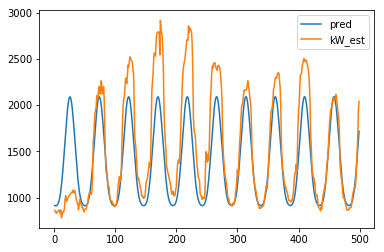

In [27]:
normal_weekdays_withfits['pred'] = (res.params[1:] * normal_weekdays_withfits[X_names]).sum(axis=1) + res.params.const
normal_weekdays_withfits[['pred','kW_est']][1:500].plot()

In [28]:
#Fourier series for weekends and public holidays
#extract data
weekends_publicholidays = bms_13to17[bms_13to17.Type_of_day != 'Normal_Weekday'].reset_index()
weekends_publicholidays = weekends_publicholidays.drop('level_0', axis = 1)
weekends_publicholidays

,Unnamed: 0,index,Humidity,ML_PH/Main_11kV_kW (kW),Temp,TimeStamp,Type_of_day,kVA,kW,kW_est
0,192,192,39,0.0,28.1,2013-01-05 00:00:00,Weekend,1193.5,NaN,1098.020
1,193,193,41,0.0,27.0,2013-01-05 00:30:00,Weekend,1181.3,NaN,1086.796
2,194,194,44,0.0,25.7,2013-01-05 01:00:00,Weekend,1140.3,NaN,1049.076
3,195,195,46,0.0,24.9,2013-01-05 01:30:00,Weekend,1123.0,NaN,1033.160
4,196,196,47,0.0,24.6,2013-01-05 02:00:00,Weekend,1039.5,NaN,956.340
5,197,197,47,0.0,24.7,2013-01-05 02:30:00,Weekend,1075.0,NaN,989.000
6,198,198,46,0.0,24.3,2013-01-05 03:00:00,Weekend,1061.0,NaN,976.120
7,199,199,45,0.0,23.6,2013-01-05 03:30:00,Weekend,1069.8,NaN,984.216
8,200,200,44,0.0,23.2,2013-01-05 04:00:00,Weekend,1087.0,NaN,1000.040
9,201,201,47,0.0,22.8,2013-01-05 04:30:00,Weekend,1071.3,NaN,985.596


In [29]:
X,X_names = fourier_terms(weekends_publicholidays.index.values,**freqs)
weekends_publicholidays_fits = pd.concat([weekends_publicholidays,
                          pd.DataFrame(X, columns=X_names, index=weekends_publicholidays.index)],
                         axis=1)
mod = sm.OLS(weekends_publicholidays_fits['kW_est'], sm.add_constant(weekends_publicholidays_fits[X_names]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 kW_est   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     630.4
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:20:42   Log-Likelihood:            -1.6748e+05
No. Observations:               26112   AIC:                         3.350e+05
Df Residuals:                   26103   BIC:                         3.350e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             928.7711      0.959    9

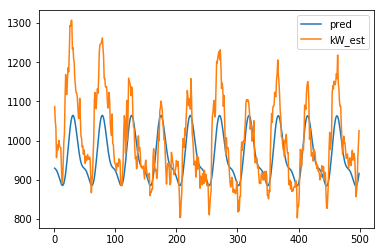

In [30]:
weekends_publicholidays_fits['pred'] = (res.params[1:] * weekends_publicholidays_fits[X_names]).sum(axis=1) + res.params.const
weekends_publicholidays_fits[['pred','kW_est']][1:500].plot()

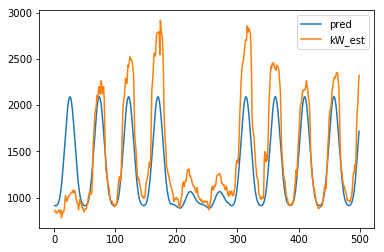

In [35]:
combinedfits = pd.concat([weekends_publicholidays_fits,normal_weekdays_withfits], axis = 0).sort_values('TimeStamp').reset_index()
combinedfits = combinedfits.drop('level_0', axis = 1)
combinedfits[['pred','kW_est']][1:500].plot()

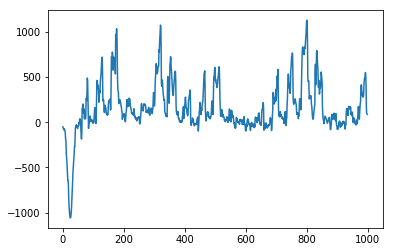

In [40]:
#Getting residuals after modelling the seasonality
combinedfits['resids_from_fourier'] = combinedfits['kW_est'] - combinedfits['pred']
combinedfits['resids_from_fourier'][1:1000].plot()

In [39]:
model = sm.OLS(combinedfits['resids_from_fourier'], combinedfits[['Temp', 'Humidity']]).fit()
combinedfits['regression_fits'] = model.predict(combinedfits[['Temp', 'Humidity']])
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     resids_from_fourier   R-squared:                       0.156
Model:                             OLS   Adj. R-squared:                  0.156
Method:                  Least Squares   F-statistic:                     8079.
Date:                 Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                         22:30:13   Log-Likelihood:            -5.9691e+05
No. Observations:                87648   AIC:                         1.194e+06
Df Residuals:                    87646   BIC:                         1.194e+06
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp           8.4113      0.067    125.43

In [ ]:
#ARIMAX with Temp Humidity and residuals
